# 3.0 Data Modelling


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import joblib
from pprint import PrettyPrinter
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
np.random.seed(0)
pp = PrettyPrinter(indent=4)

## Data Preparation

Read dataframe containing features and target variable ensure no NaNs

In [19]:
data = pd.read_csv('data/data.csv', index_col='symbol')


data.isnull().sum()
data.shape
data

revenuePerShare               0
interestDebtPerShare          0
enterpriseValue               0
peRatio                       0
priceToSalesRatio             0
                             ..
priceEarningsToGrowthRatio    0
priceSalesRatio               0
enterpriseValueMultiple       0
priceFairValue                0
shareGrowth                   0
Length: 96, dtype: int64

(532, 96)

,revenuePerShare,interestDebtPerShare,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,...,priceToBookRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,enterpriseValueMultiple,priceFairValue,shareGrowth
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,13.9911,5.4509,1.206755e+12,20.9536,4.4501,16.6853,19.6586,12.7952,12.7952,4.6383,...,12.7952,20.9536,19.6586,16.6853,16.6853,7.0516,4.4501,14.7417,12.7952,0.307494
MSFT,16.4008,9.8534,1.122813e+12,27.0451,8.4331,20.3363,27.7378,10.3709,10.3709,8.9223,...,10.3709,27.0451,27.7378,20.3363,20.3363,5.2884,8.4331,19.3402,10.3709,0.150507
AMZN,556.5913,83.5496,9.472398e+11,81.3620,3.3610,24.4800,43.5424,15.1921,15.1921,3.3767,...,15.1921,81.3620,43.5424,24.4800,24.4800,4.0709,3.3610,25.3605,15.1921,0.064639
FB,24.5817,0.1523,5.839473e+11,32.5999,8.5238,16.5944,28.4088,5.9632,5.9632,8.2599,...,5.9632,32.5999,28.4088,16.5944,16.5944,4.2401,8.5238,19.1001,5.9632,0.167454
GOOGL,231.7023,6.6623,1.001931e+12,29.5803,6.2764,18.6331,32.7998,5.0430,5.0430,6.1902,...,5.0430,29.5803,32.7998,18.6331,18.6331,0.6723,6.2764,19.4527,5.0430,0.110605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RE,181.4979,16.3394,1.086629e+10,10.9370,1.4934,5.9614,5.9614,1.2089,1.2089,1.4699,...,1.2089,10.9370,5.9614,5.9614,5.9614,5.0031,1.4934,9.6104,1.2089,0.049232
SNA,72.7674,19.3953,9.959858e+09,12.9937,2.2153,13.3578,15.6661,2.6433,2.6433,2.4485,...,2.6433,12.9937,15.6661,13.3578,13.3578,1.0474,2.2153,10.4984,2.6433,0.094457
SNA,73.9582,21.9782,9.739160e+09,12.6371,2.1545,12.9912,15.2362,2.5707,2.5707,2.3943,...,2.5707,12.6371,15.2362,12.9912,12.9912,1.0022,2.1545,9.3046,2.5707,0.094457


Convert share price growth feature into a binary target variable for classification

In [20]:
threshold = 0.2
data['shareGrowthAboveTen'] = data['shareGrowth'].apply(lambda x: 1 if x>threshold else 0)
target = data['shareGrowthAboveTen']

Scale the data to limit influence of larger values

In [24]:
scaler = MinMaxScaler()
scaler_columns = data.select_dtypes(include=['float']).columns
data[scaler_columns] = scaler.fit_transform(data[scaler_columns])
# Check the data frame
data

,revenuePerShare,interestDebtPerShare,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,...,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,enterpriseValueMultiple,priceFairValue,shareGrowth,shareGrowthAboveTen
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,0.551683,0.873772,9.053133e-05,1.139180e-06,6.801170e-07,0.000001,0.930224,0.000013,0.000013,9.623392e-07,...,1.139180e-06,0.930224,0.000001,0.000001,5.611567e-08,6.801170e-07,0.000011,0.000013,0.599612,1
MSFT,0.551690,0.873793,8.425863e-05,1.145102e-06,9.265312e-07,0.000001,0.930225,0.000013,0.000013,1.227375e-06,...,1.145102e-06,0.930225,0.000001,0.000001,5.611567e-08,9.265312e-07,0.000011,0.000013,0.443309,0
AMZN,0.553244,0.874159,7.113870e-05,1.197907e-06,6.127381e-07,0.000001,0.930225,0.000013,0.000013,8.842885e-07,...,1.197907e-06,0.930225,0.000001,0.000001,5.611567e-08,6.127381e-07,0.000011,0.000013,0.357815,0
FB,0.551713,0.873745,4.399116e-05,1.150503e-06,9.321425e-07,0.000001,0.930225,0.000013,0.000013,1.186395e-06,...,1.150503e-06,0.930225,0.000001,0.000001,5.611567e-08,9.321425e-07,0.000011,0.000013,0.460182,0
GOOGL,0.552309,0.873778,7.522559e-05,1.147567e-06,7.931037e-07,0.000001,0.930225,0.000013,0.000013,1.058350e-06,...,1.147567e-06,0.930225,0.000001,0.000001,5.611567e-08,7.931037e-07,0.000011,0.000013,0.403581,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RE,0.552165,0.873826,1.166875e-06,1.129443e-06,4.971963e-07,0.000001,0.930224,0.000013,0.000013,7.663215e-07,...,1.129443e-06,0.930224,0.000001,0.000001,5.611567e-08,4.971963e-07,0.000011,0.000013,0.342476,0
SNA,0.551852,0.873841,1.099140e-06,1.131442e-06,5.418577e-07,0.000001,0.930224,0.000013,0.000013,8.268640e-07,...,1.131442e-06,0.930224,0.000001,0.000001,5.611567e-08,5.418577e-07,0.000011,0.000013,0.387503,0
SNA,0.551855,0.873854,1.082648e-06,1.131095e-06,5.380962e-07,0.000001,0.930224,0.000013,0.000013,8.235108e-07,...,1.131095e-06,0.930224,0.000001,0.000001,5.611567e-08,5.380962e-07,0.000011,0.000013,0.387503,0


Get target variable and remove collinear features to target variable (features which use target variable to calculate its own value). Also removed quickratio as it is very similar to current ratio which is a feature of influence

In [25]:
target  = data['shareGrowthAboveTen']
features = data.drop([
    'shareGrowth',
    'shareGrowthAboveTen',
    'priceEarningsToGrowthRatio',
    'priceBookValueRatio',
    'priceToBookRatio',
    'ptbRatio',
    'pbRatio',
    'dividendYield',
    'weightedAverageSharesGrowth',
    'weightedAverageSharesDilutedGrowth',
    'quickRatio'
    
], axis=1)
features.shape

(532, 86)

Check the ideal test, training split

In [9]:
# Define a range of test sizes to evaluate
test_sizes = [0.05, 0.08, 0.1, 0.2,]

# Initialize the model
model = GradientBoostingClassifier(random_state=0)

# Dictionary to store results
results = {}

# Evaluate each test size
for test_size in test_sizes:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=0)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Store the results
    results[test_size] = {'train_score': train_score, 'test_score': test_score}

# Print results
for test_size, scores in results.items():
    print(f"Test Size: {test_size}")
    print(f"  Train Score: {scores['train_score']}")
    print(f"  Test Score: {scores['test_score']}")
    
# Select the best test size based on the highest test score
best_test_size = max(results, key=lambda k: results[k]['test_score'])
print(f"\nBest Test Size: {best_test_size}")
print(f"Best Test Score: {results[best_test_size]['test_score']}")

GradientBoostingClassifier(random_state=0)

GradientBoostingClassifier(random_state=0)

GradientBoostingClassifier(random_state=0)

GradientBoostingClassifier(random_state=0)

Test Size: 0.05
  Train Score: 0.9881188118811881
  Test Score: 0.8518518518518519
Test Size: 0.08
  Train Score: 0.9918200408997955
  Test Score: 0.8604651162790697
Test Size: 0.1
  Train Score: 0.9874476987447699
  Test Score: 0.8888888888888888
Test Size: 0.2
  Train Score: 0.9952941176470588
  Test Score: 0.794392523364486

Best Test Size: 0.1
Best Test Score: 0.8888888888888888


Split data into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.1, random_state=0
)

Check for the best model and parameters

In [22]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(random_state=0),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=0, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(n_jobs=-1),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=0, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
           }
    },
    'MLPClassifier': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['tanh', 'relu'],
            'solver': ['adam', 'sgd'],
            'alpha': [0.0001, 0.001, 0.01]
        }
    }
}
# Define inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Function to perform nested cross-validation for a given model and parameter grid
def nested_cv(model, param_grid, X, Y):
    clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, n_jobs=-1)
    nested_score = cross_val_score(clf, features, target, cv=outer_cv, n_jobs=-1)
    clf.fit(features, target)
    best_params = clf.best_params_
    best_score = clf.best_score_
    return nested_score, best_params, best_score

# Evaluate each model using nested cross-validation
results = {}
for model_name, model_info in param_grids.items():
    start_time = time.time()
    nested_score, best_params, best_score = nested_cv(model_info['model'], model_info['params'], features, target)
    end_time = time.time()
    results[model_name] = {
        'nested_score': nested_score,
        'average_score': nested_score.mean(),
        'best_params': best_params,
        'best_score': best_score,
        'execution_time': end_time - start_time
    }

# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Nested Cross-Validation Scores: {result['nested_score']}")
    print(f"Average Nested Cross-Validation Score: {result['average_score']}")
    print(f"Best Hyperparameters: {result['best_params']}")
    print(f"Best Model Score: {result['best_score']}")
    print(f"Execution time: {result['execution_time']} seconds\n")

# Identify the best model
best_model_name = max(results, key=lambda name: results[name]['average_score'])
print(f"Best Model: {best_model_name}")
print(f"Average Nested Cross-Validation Score: {results[best_model_name]['average_score']}")
print(f"Best Hyperparameters: {results[best_model_name]['best_params']}")

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 246, in pr

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 246, in pr

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.80061718        nan 0.80812908        nan 0.81749251]
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid/anaconda3/lib/pyth

Model: GradientBoostingClassifier
Nested Cross-Validation Scores: [0.78504673 0.89719626 0.83962264 0.77358491 0.80188679]
Average Nested Cross-Validation Score: 0.8194674660553695
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Model Score: 0.8269617351437137
Execution time: 165.61096596717834 seconds

Model: RandomForestClassifier
Nested Cross-Validation Scores: [0.81308411 0.89719626 0.8490566  0.73584906 0.80188679]
Average Nested Cross-Validation Score: 0.8194145653323929
Best Hyperparameters: {'max_depth': 3, 'n_estimators': 100}
Best Model Score: 0.8250749426908834
Execution time: 12.065809965133667 seconds

Model: KNeighborsClassifier
Nested Cross-Validation Scores: [0.8317757  0.89719626 0.83018868 0.75471698 0.77358491]
Average Nested Cross-Validation Score: 0.8174925057309116
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Model Score: 0.8174925057309116
Execution time: 0.47170090675354004 seconds

Model: GaussianN

## Logistical Regression

Initialise logistical regression and train model

LogisticRegression(C=0.01, solver='liblinear')

Accuracy: 0.8703703703703703
Confusion Matrix:
 [[47  0]
 [ 7  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        47
           1       0.00      0.00      0.00         7

    accuracy                           0.87        54
   macro avg       0.44      0.50      0.47        54
weighted avg       0.76      0.87      0.81        54

Top 10 Features:
                                   Feature  Importance
13                           currentRatio    0.022131
49                operatingCashFlowGrowth    0.006737
30       generalAndAdministrativeExpenses    0.000520
11                      freeCashFlowYield    0.000010
64                         operatingCycle   -0.000249
56     tenYDividendperShareGrowthPerShare   -0.001852
55  fiveYShareholdersEquityGrowthPerShare   -0.001861
33                      operatingExpenses   -0.001900
42                  weightedAverageShsOut   -0.001963
43               weighte

/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve for Logistical Regression')

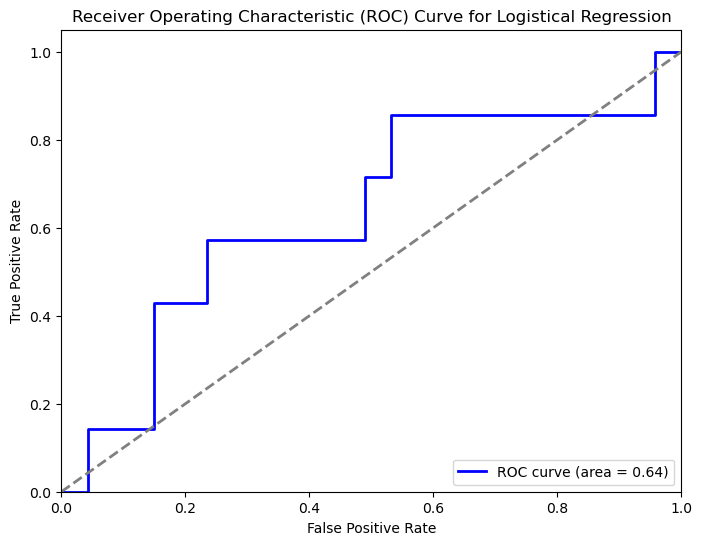

In [23]:
# Initialize the logistic regression model with the best parameters
best_params = {'C': 0.01, 'solver': 'liblinear'}
model = LogisticRegression(C=best_params['C'], solver=best_params['solver'])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Extract feature importance (coefficients)
feature_importance = model.coef_[0]
featuresLR = features.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': featuresLR,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Top 10 Features:\n", feature_importance_df.head(10))

# Calculate ROC curve and ROC AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistical Regression')
plt.legend(loc="lower right")
plt.show()

## Random Forest

Initialise logistical regression and train model

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

Accuracy: 0.8703703703703703
Confusion Matrix:
 [[47  0]
 [ 7  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        47
           1       0.00      0.00      0.00         7

    accuracy                           0.87        54
   macro avg       0.44      0.50      0.47        54
weighted avg       0.76      0.87      0.81        54

Top 10 Features:
                Feature  Importance
16         payoutRatio    0.058492
12     netDebtToEBITDA    0.030442
58   receivablesGrowth    0.027784
50  freeCashFlowGrowth    0.026585
64      operatingCycle    0.026113
69      returnOnAssets    0.025674
67     netProfitMargin    0.025030
15       incomeQuality    0.024755
70      returnOnEquity    0.024339
75  fixedAssetTurnover    0.021158


/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve for Random Forest')

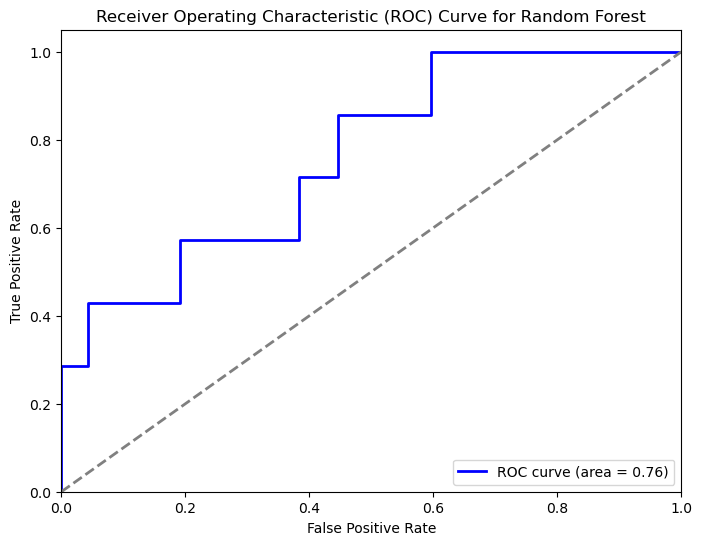

In [16]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Extract feature importance
feature_importance = model.feature_importances_
featuresRF = features.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': featuresRF,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Top 10 Features:\n", feature_importance_df.head(10))

# Calculate ROC curve and ROC AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Get model predictions

In [37]:
# Make predictions
predictions = model.predict(features)
probabilities = model.predict_proba(features)

# Display the top ten predictions and their indices
positive_class_probs = probabilities[:, 1]
top_ten_indices = np.argsort(positive_class_probs)[-10:][::-1]
top_ten_actual_indices = features.index[top_ten_indices]

for pos_idx in top_ten_indices:
    actual_idx = features.index[pos_idx]
    print(f"Data point {actual_idx}: Predicted class = {predictions[pos_idx]}, Probability = {positive_class_probs[pos_idx]}")

top_ten_indices_sorted = np.argsort(positive_class_probs)[-10:]
top_ten_actual_indices_sorted = features.index[top_ten_indices_sorted]


Data point ALNY: Predicted class = 1, Probability = 0.7189554614037542
Data point MRNA: Predicted class = 1, Probability = 0.6592229300318567
Data point HAL: Predicted class = 1, Probability = 0.6463043818497274
Data point GH: Predicted class = 1, Probability = 0.643405485704502
Data point BMRN: Predicted class = 1, Probability = 0.6430158535377469
Data point Z: Predicted class = 1, Probability = 0.6290238511042727
Data point JPM: Predicted class = 1, Probability = 0.6147638729251521
Data point FIVN: Predicted class = 1, Probability = 0.5903654364729414
Data point TDOC: Predicted class = 1, Probability = 0.571648782249323
Data point CVNA: Predicted class = 1, Probability = 0.5625262983279293


## MLP Classifier

Initialise logistical regression and train model

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=1000,
              random_state=42, solver='sgd')

Accuracy: 0.8703703703703703
Confusion Matrix:
 [[47  0]
 [ 7  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        47
           1       0.00      0.00      0.00         7

    accuracy                           0.87        54
   macro avg       0.44      0.50      0.47        54
weighted avg       0.76      0.87      0.81        54



/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/astrid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve for MLPclassifier')

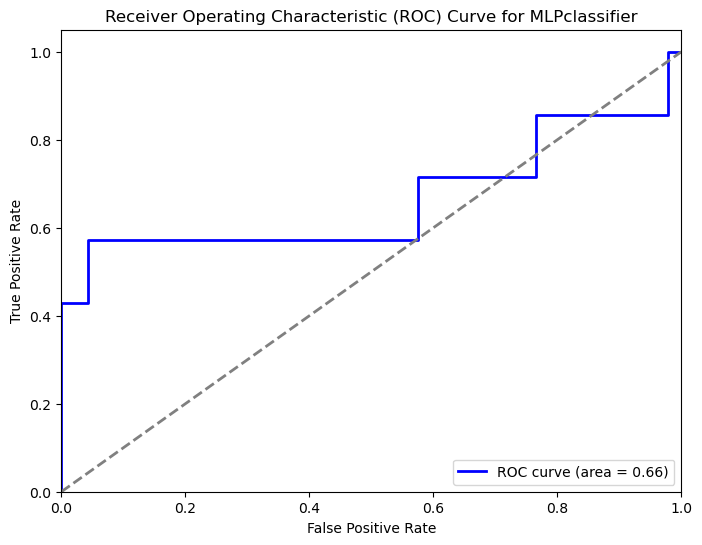

In [25]:
# Initialize the neural network model
model = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', alpha=0.0001, solver='sgd', max_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Calculate ROC curve and ROC AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLPclassifier')
plt.legend(loc="lower right")
plt.show()

